# Problem Statement

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df= pd.read_csv(r"E:\data science excelr\(13)KNN\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#Data Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.shape

(214, 10)

<AxesSubplot:xlabel='Type', ylabel='count'>

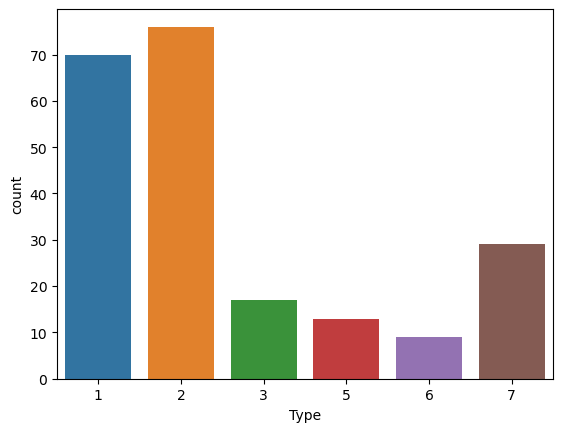

In [20]:
sns.countplot(df['Type'])

<AxesSubplot:>

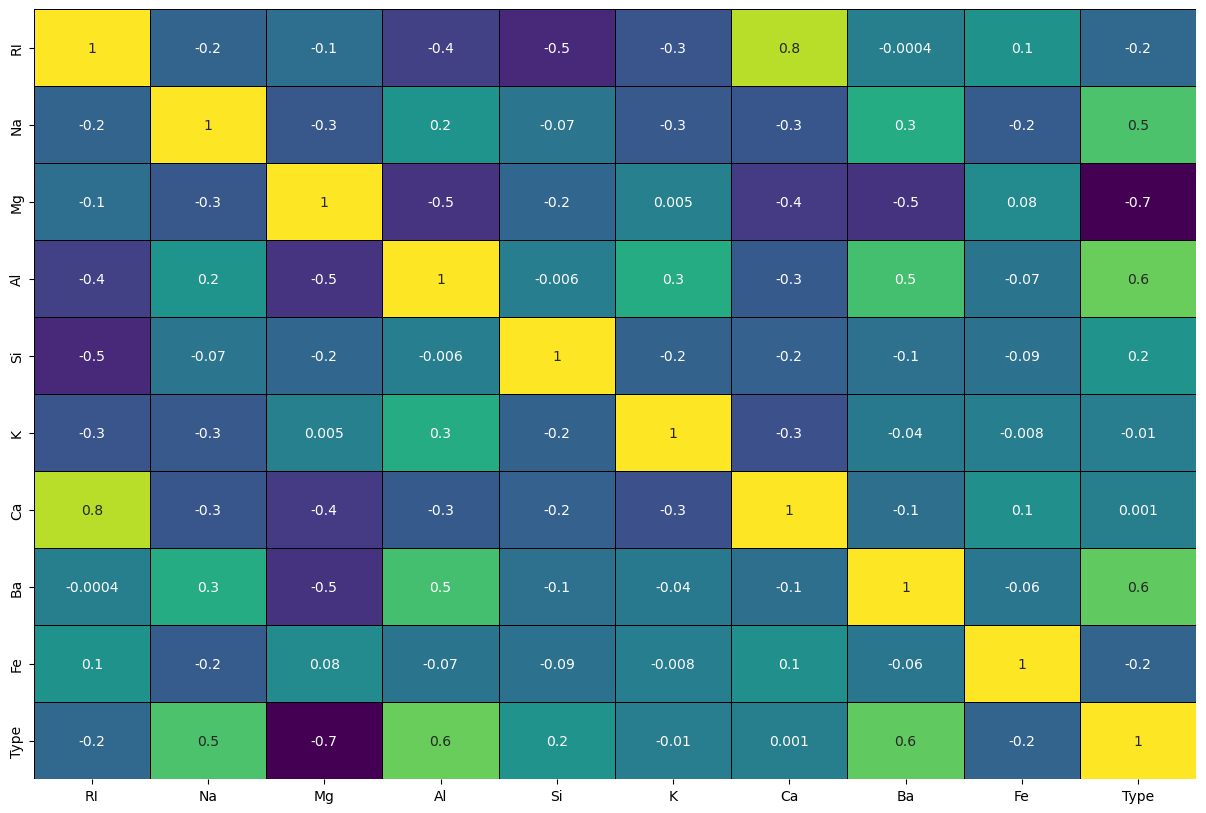

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

# Model Building

In [7]:
x=df.iloc[:,0:9]
y= df['Type']

In [8]:
sc= StandardScaler()

x= sc.fit_transform(x)
x 

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [11]:
xtrain.shape

(160, 9)

In [12]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    print(model.score(xtrain, ytrain))
    print(model.score(xtest,ytest))
    print(classification_report(ytest,ypred))

In [13]:
predict(KNeighborsClassifier(n_neighbors=5))

0.7375
0.6481481481481481
              precision    recall  f1-score   support

           1       0.68      0.85      0.76        20
           2       0.53      0.53      0.53        15
           3       0.00      0.00      0.00         1
           5       0.33      0.50      0.40         4
           6       0.00      0.00      0.00         4
           7       1.00      0.80      0.89        10

    accuracy                           0.65        54
   macro avg       0.42      0.45      0.43        54
weighted avg       0.61      0.65      0.62        54



In [14]:
trainac=[]
testac=[]

for i in range(1,30):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred= knn.predict(xtest)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [15]:
data= pd.DataFrame({'Train Accuracy' :trainac,
     'Test Accuracy': testac})
data

,Train Accuracy,Test Accuracy
0,1.00000,0.703704
1,0.81250,0.722222
2,0.80625,0.722222
3,0.75625,0.685185
4,0.73750,0.648148
5,0.71875,0.703704
6,0.72500,0.703704
7,0.68125,0.685185
8,0.69375,0.611111
9,0.67500,0.592593


In [16]:
data['diff']= data['Train Accuracy']-data['Test Accuracy']
data[data['diff'] == min(data['diff'])]

,Train Accuracy,Test Accuracy,diff
24,0.61875,0.62963,-0.01088


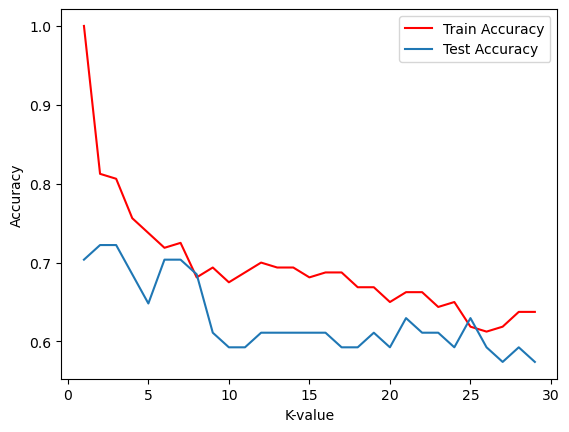

In [17]:
plt.plot(range(1,30),trainac,color='red', label='Train Accuracy')
plt.plot(range(1,30),testac,label='Test Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
predict(KNeighborsClassifier(n_neighbors=7))

0.725
0.7037037037037037
              precision    recall  f1-score   support

           1       0.70      0.80      0.74        20
           2       0.61      0.73      0.67        15
           3       0.00      0.00      0.00         1
           5       0.60      0.75      0.67         4
           6       0.00      0.00      0.00         4
           7       1.00      0.80      0.89        10

    accuracy                           0.70        54
   macro avg       0.48      0.51      0.49        54
weighted avg       0.66      0.70      0.67        54

